## Classificação de Textos usando Pipeline do Sklearn

### Importanto os módulos necessários:
Dataset usado: https://www.kaggle.com/team-ai/spam-text-message-classification

In [1]:
import pandas as pd 
df = pd.read_csv("SPAM text message 20170820 - Data.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Análise Rápida dos dados

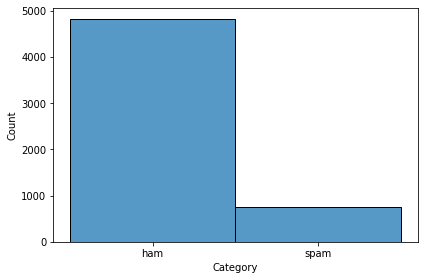

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="Category")
plt.tight_layout()
plt.show()

Como o número de observações marcadas como spam é muito menor que o número de observações marcadas como não spam, apenas a acurácia do modelo não será o suficiente para avalia-lo de maneira adequada

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def WordNuvem(df_series): 
    '''
    Concatena todos os textos do DataSeries e produz um WordCloud dos resultados
    '''
    text = df_series.sum()
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure(figsize=(10,12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


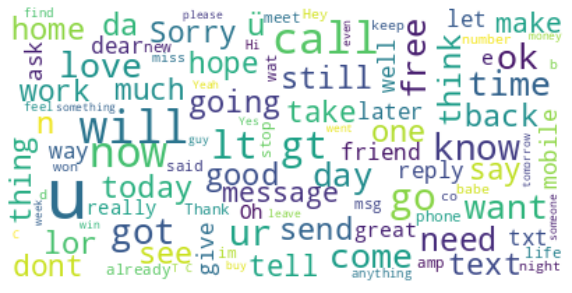

In [4]:
WordNuvem(df['Message'])

### Analisando as mensagens de Spam e não Spam separadamente

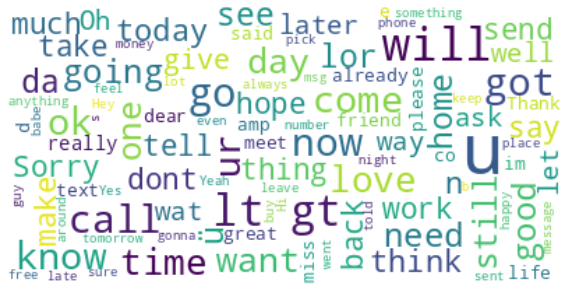

In [5]:
# Mensagens não Spam 
df_nspam = df[df['Category']=='ham']
WordNuvem(df_nspam['Message'])

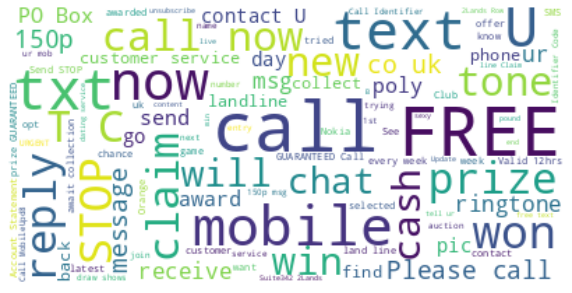

In [6]:
# Mensagens Spam 
df_spam = df[df['Category']=='spam']
WordNuvem(df_spam['Message'])

### Separando os dados e transformando-os

In [7]:
# bibliotecas necessárias
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [8]:
# adequando o target para um valor binário 
replace_dict = {'ham':0, 'spam':1}
df['Category'].replace(replace_dict, inplace=True)

# separação entre treino e teste
X = df['Message']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Montando o Pipeline

In [9]:
model = make_pipeline(CountVectorizer(), TfidfTransformer(), MultinomialNB(fit_prior=False))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Avaliando o Modelo

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

def resultados(y_test, y_pred):
    '''
    Evidencia métricas do modelo e mostra 
    '''
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f'Acurácia: {acc} \n F1: {f1} \n Precisão: {precision} \n Recall: {recall}')
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

Acurácia: 0.9813352476669059 
 F1: 0.9281767955801105 
 Precisão: 0.9545454545454546 
 Recall: 0.9032258064516129


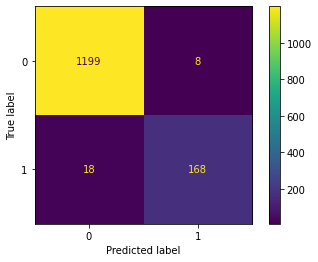

In [11]:
resultados(y_test, y_pred)